In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df=pd.read_csv("netflix_titles.csv")

df.shape
df.columns
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
df['director'].fillna('Not available', inplace=True)
df['cast'].fillna('Not available', inplace=True)
df['country'].fillna('country', inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['duration'],inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [33]:

df['date_added'] = df['date_added'].astype(str).str.strip()


df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['date_added'].head()



0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

<Axes: xlabel='type', ylabel='count'>

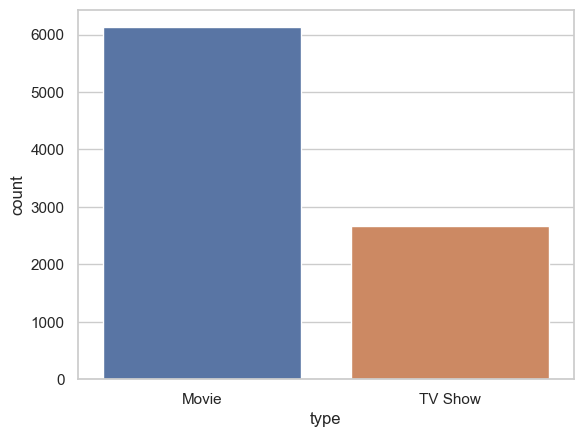

In [23]:
sns.countplot(x='type', data=df)


<Axes: xlabel='country'>

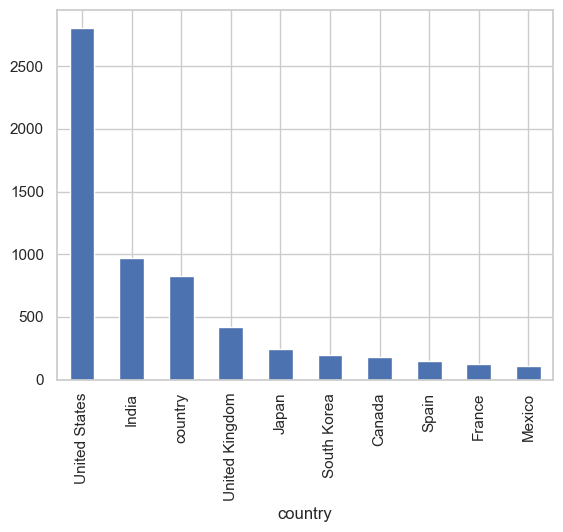

In [25]:
df['country'].value_counts().head(10).plot(kind='bar')


<Axes: xlabel='count', ylabel='rating'>

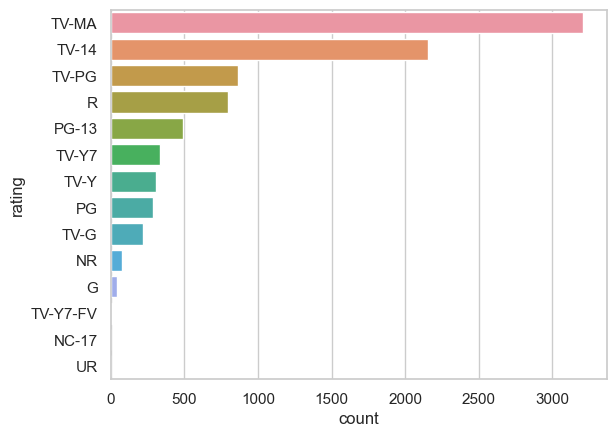

In [27]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)


<Axes: xlabel='year_added'>

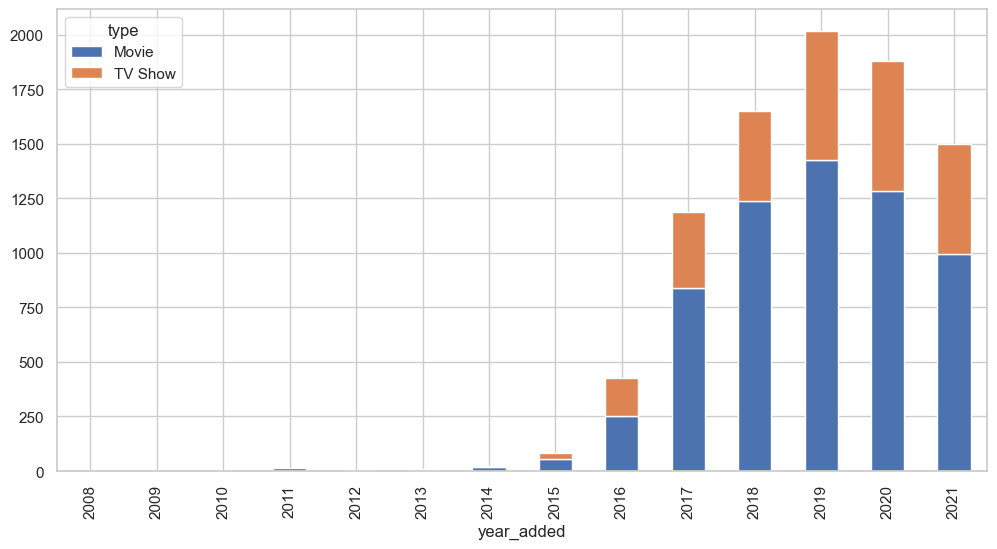

In [35]:
df.groupby(['year_added', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,6))


<Axes: xlabel='month_added'>

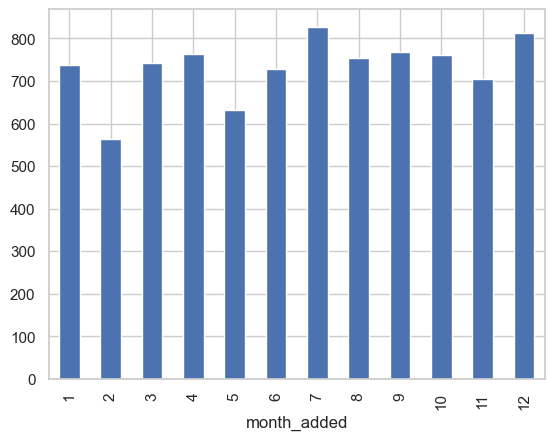

In [37]:
df['month_added'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='listed_in'>

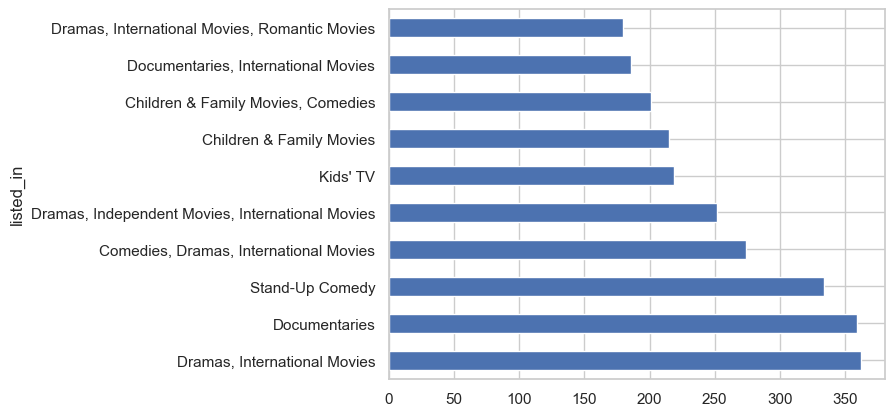

In [39]:
df['listed_in'].value_counts().head(10).plot(kind='barh')


<Axes: >

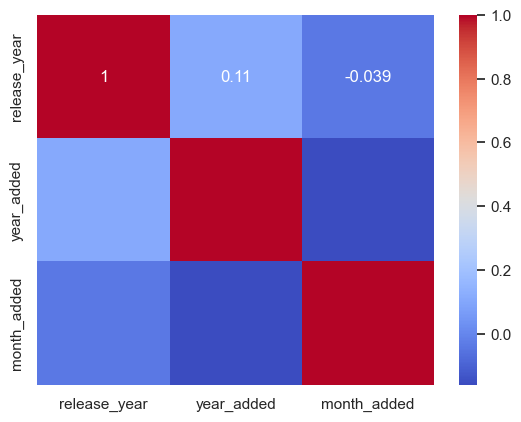

In [41]:

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
